In [3]:
from utils.dataset import CocoDataset
from IPython.display import display
import matplotlib.pyplot as plt

In [4]:
CDS = CocoDataset(image_folder=r'D:\Work\work\FasterRCNN-Torchvision-FineTuning\dataset\AquariumDataset\train\images',
                  annotations_file=r'D:\Work\work\FasterRCNN-Torchvision-FineTuning\dataset\AquariumDataset\train\_annotations.coco.json',
                  height=640,width=640)

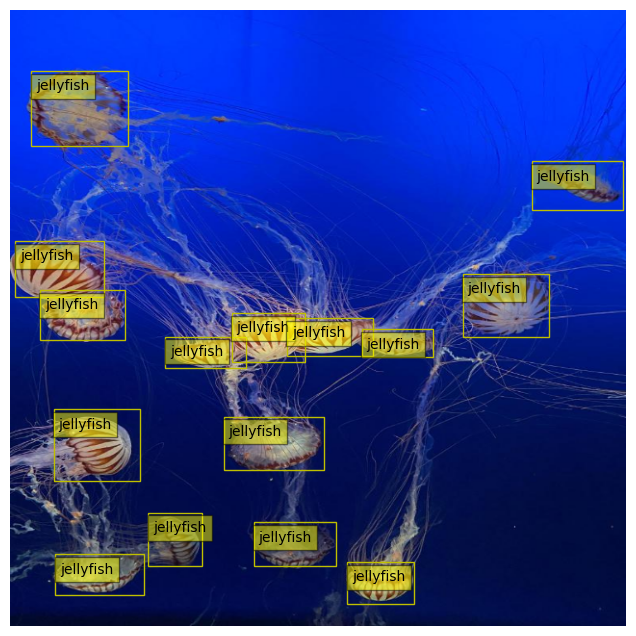

In [5]:
image_resized, target = CDS[12]

clss = ['fish','jellyfish','penguin','puffin','shark','starfish','stingray']
classnames = [clss[i-1] for i in target['labels'].tolist()]

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image_resized)
plt.close()
fig, ax = CDS.display_bbox(bboxes=target['boxes'],fig=fig, ax=ax, 
                           in_format='xyxy', line_width=1, classes=classnames)
ax.axis('off')
display(fig)